In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from plot_functions import *
from sklearn.model_selection import KFold

In [2]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os


def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [3]:
n_splits = 10
import sys
case=2
a=2
cost='abs'

In [4]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [5]:
au_df, au_dfc = create_matrix_single_region("Austin", year)
au_tensor = get_tensor(au_df, au_dfc)

In [6]:
df, dfc = create_matrix_single_region("SanDiego", year)
tensor = get_tensor(df, dfc)
static_sd = df[['area','total_occupants','num_rooms']]
static_sd = static_sd.div(static_sd.max()).values

In [7]:
from sklearn.model_selection import train_test_split, KFold

In [8]:
n_splits = 10


In [9]:
from common import compute_rmse

In [10]:
np.arange(0.1, 1.0, 0.1)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [13]:
pred = {}
sd = {}
out = {}
n_splits = 10
NUM_RANDOM = 3
n_iter=1200
TRAIN_SPLITS = range(10, 110, 40)
case = 2
num_home=5

cost = 'l21'
algo = 'adagrad'
for static_fac in ['static',None]:
    if static_fac is None:
        H_known_Sd = None
    else:
        H_known_Sd = static_sd    
    np.random.seed(0)
    pred[static_fac] = {}
    for lam in [1e-3, 1e-2, 1e-1, 0, 1]:
        pred[static_fac][lam] = {}
        for a in range(2, 3):

            pred[static_fac][lam][a] = {}
            for random_seed in range(NUM_RANDOM):
                pred[static_fac][lam][a][random_seed] = {}
                for appliance in APPLIANCES_ORDER:
                    pred[static_fac][lam][a][random_seed][appliance] = {f:[] for f in TRAIN_SPLITS}

            kf = KFold(n_splits=n_splits)
            for random_seed in range(NUM_RANDOM):

                for train_percentage in TRAIN_SPLITS:
                    print(lam, static_fac, a, random_seed,train_percentage)
                    for train_max, test in kf.split(df):

                        num_train = int((train_percentage*len(train_max)/100)+0.5)
                        if train_percentage==100:
                            train = train_max
                        else:
                            train, _ = train_test_split(train_max, train_size = train_percentage/100.0, random_state=random_seed)
                        train_ix = df.index[train]
                        test_ix = df.index[test]

                        num_test = len(test_ix)
                        train_test_ix = np.concatenate([test_ix, train_ix])
                        df_t, dfc_t = df.ix[train_test_ix], dfc.ix[train_test_ix]
                        tensor = get_tensor(df_t, dfc_t)
                        tensor_copy = tensor.copy()
                        # First n
                        tensor_copy[:num_test, 1:, :] = np.NaN
                        if static_fac is not None:
                            H, A, T, Hs, As, Ts, HATs, costs = learn_HAT_adagrad(case, tensor_copy, num_home, a, num_iter=n_iter, lr=1, dis=False, cost_function=cost, H_known=H_known_Sd[np.concatenate([test, train])], penalty_coeff=lam)
                        else:
                            H, A, T, Hs, As, Ts, HATs, costs = learn_HAT_adagrad(case, tensor_copy, num_home, a, num_iter=n_iter, lr=1, dis=False, cost_function=cost, penalty_coeff=lam)

                        HAT = multiply_case(H, A, T, case)
                        for appliance in APPLIANCES_ORDER:
                            pred[static_fac][lam][a][random_seed][appliance][train_percentage].append(pd.DataFrame(HAT[:num_test, appliance_index[appliance], :], index=test_ix))


(0.001, 'static', 2, 0, 10)
(0.001, 'static', 2, 0, 50)
(0.001, 'static', 2, 0, 90)
(0.001, 'static', 2, 1, 10)
(0.001, 'static', 2, 1, 50)
(0.001, 'static', 2, 1, 90)
(0.001, 'static', 2, 2, 10)
(0.001, 'static', 2, 2, 50)
(0.001, 'static', 2, 2, 90)
(0.01, 'static', 2, 0, 10)
(0.01, 'static', 2, 0, 50)
(0.01, 'static', 2, 0, 90)
(0.01, 'static', 2, 1, 10)
(0.01, 'static', 2, 1, 50)
(0.01, 'static', 2, 1, 90)
(0.01, 'static', 2, 2, 10)
(0.01, 'static', 2, 2, 50)
(0.01, 'static', 2, 2, 90)
(0.1, 'static', 2, 0, 10)
(0.1, 'static', 2, 0, 50)
(0.1, 'static', 2, 0, 90)
(0.1, 'static', 2, 1, 10)
(0.1, 'static', 2, 1, 50)
(0.1, 'static', 2, 1, 90)
(0.1, 'static', 2, 2, 10)
(0.1, 'static', 2, 2, 50)
(0.1, 'static', 2, 2, 90)
(0, 'static', 2, 0, 10)
(0, 'static', 2, 0, 50)
(0, 'static', 2, 0, 90)
(0, 'static', 2, 1, 10)
(0, 'static', 2, 1, 50)
(0, 'static', 2, 1, 90)
(0, 'static', 2, 2, 10)
(0, 'static', 2, 2, 50)
(0, 'static', 2, 2, 90)
(1, 'static', 2, 0, 10)
(1, 'static', 2, 0, 50)
(1, 'st

In [14]:
from common import compute_rmse_fraction

In [15]:
out = {}
algo = 'adagrad'
for static_fac in ['static',None]:
    out[static_fac] = {}
    for lam in [1e-3, 1e-2, 1e-1, 0, 1]:
        out[static_fac][lam] = {}
        for a in range(2, 3):
            out[static_fac][lam][a] = {}
            for random_seed in range(NUM_RANDOM):
                out[static_fac][lam][a][random_seed] = {}

                for appliance in APPLIANCES_ORDER[1:]:
                    out[static_fac][lam][a][random_seed][appliance] = {}
                    for f in TRAIN_SPLITS:
                        s = pd.concat(pred[static_fac][lam][a][random_seed][appliance][f]).ix[df.index]
                        if appliance=="hvac":
                            out[static_fac][lam][a][random_seed][appliance][f] = compute_rmse_fraction(appliance,s[range(4, 10)],'SanDiego')[2]
                        else:   
                            out[static_fac][lam][a][random_seed][appliance][f] = compute_rmse_fraction(appliance, s,'SanDiego')[2]

    

/Users/nipunbatra/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


In [32]:
import pickle
pickle.dump(out, open('predictions/normal-sparse-static.pkl','w'))

5.61459454882
5.927593897
6.12601109192
6.39226779683
5.71690566525


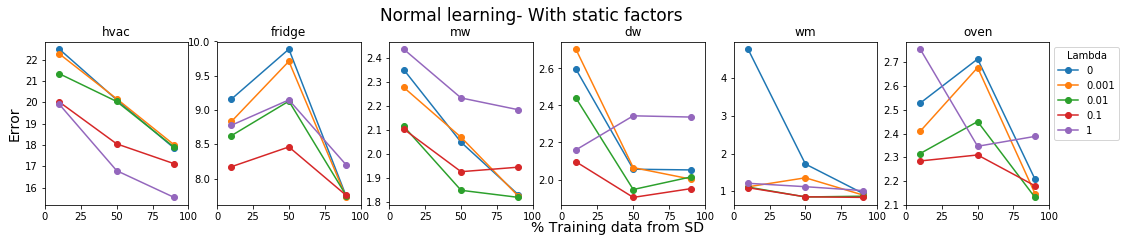

In [30]:
static_res = {}
fig, ax = plt.subplots(ncols=6, figsize=(18, 3))

for lam in [0, 1e-3, 1e-2, 1e-1, 1]:
    static_res[lam] = pd.Panel(out['static'][lam][2]).mean(axis=0)
    for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
        static_res[lam][appliance].plot(ax=ax[i], marker='o', title=appliance)
        ax[i].set_xlim((0, 100))
plt.legend([0, 1e-3, 1e-2, 1e-1, 1], bbox_to_anchor=(1, 1), title='Lambda')
fig.text(0.5, 0, "% Training data from SD", fontsize=14)
ax[0].set_ylabel("Error", fontsize=14)

print static_res[0.1].mean().mean()
print static_res[0.01].mean().mean()
print static_res[0.001].mean().mean()
print static_res[0.0].mean().mean()
print static_res[1].mean().mean()
plt.suptitle("Normal learning- With static factors", fontsize=17,y=1.04)


5.29569115205
5.29331341176
5.40300182878
5.69381795578
5.50673501027


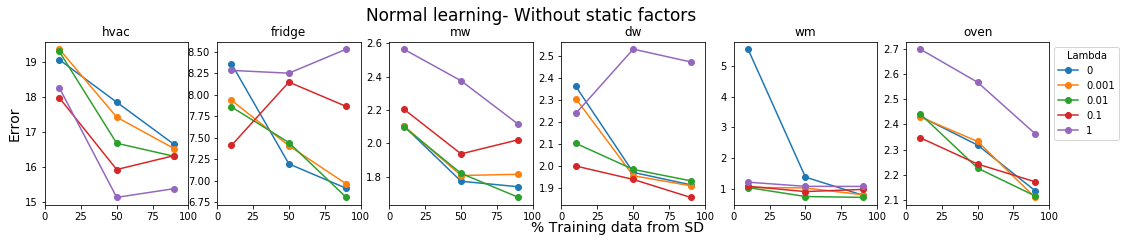

In [31]:
static_res = {}
fig, ax = plt.subplots(ncols=6, figsize=(18, 3))

for lam in [0, 1e-3, 1e-2, 1e-1, 1]:
    static_res[lam] = pd.Panel(out[None][lam][2]).mean(axis=0)
    for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
        static_res[lam][appliance].plot(ax=ax[i], marker='o', title=appliance)
        ax[i].set_xlim((0, 100))
plt.legend([0, 1e-3, 1e-2, 1e-1, 1], bbox_to_anchor=(1, 1), title='Lambda')
fig.text(0.5, 0, "% Training data from SD", fontsize=14)
ax[0].set_ylabel("Error", fontsize=14)
plt.suptitle("Normal learning- Without static factors", fontsize=17,y=1.04)

print static_res[0.1].mean().mean()
print static_res[0.01].mean().mean()
print static_res[0.001].mean().mean()
print static_res[0.0].mean().mean()
print static_res[1].mean().mean()


In [16]:
static_results = pd.Panel(out['static'][a]).mean(axis=0)
static_results
static_results_err=  pd.Panel(out['static'][a]).std(axis=0)
static_results

,dw,fridge,hvac,mw,oven,wm
10,2.597097,9.159902,22.489510,2.353440,2.528138,4.759672
50,2.055609,9.888209,20.113718,2.049945,2.713646,1.722712
90,2.051766,7.740238,17.849582,1.830264,2.207642,0.949732


In [16]:
none_results = pd.Panel(out[None][a]).mean(axis=0)
none_results
none_results_err=  pd.Panel(out[None][a]).std(axis=0)
none_results

,dw,fridge,hvac,mw,oven,wm
10,2.462496,8.506034,19.303400,2.140486,2.502156,5.399474
50,2.077979,6.828912,17.930401,1.830240,2.507437,1.422561
90,1.918157,6.932045,16.895493,1.735175,2.182054,0.785008


In [17]:
none_results = pd.Panel(out[None][a]).mean(axis=0)
none_results
none_results_err=  pd.Panel(out[None][a]).std(axis=0)
none_results

,dw,fridge,hvac,mw,oven,wm
10,2.362342,8.362002,19.067551,2.105688,2.431865,5.544830
50,1.970319,7.196272,17.851836,1.773440,2.318082,1.372124
90,1.913932,6.912154,16.644179,1.740429,2.137684,0.783995


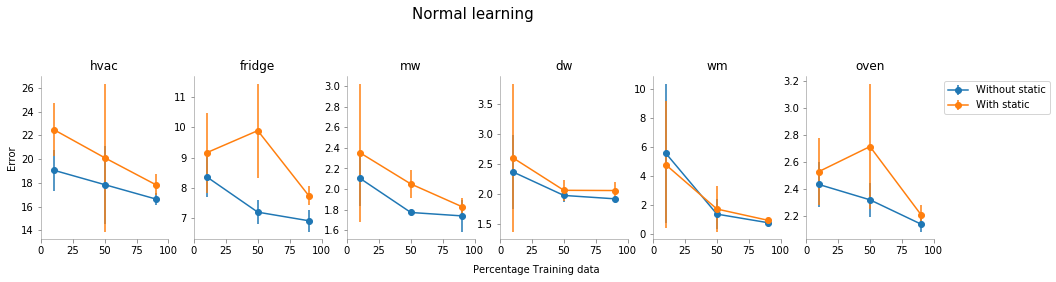

In [19]:
fig, ax = plt.subplots(ncols=6, figsize=(16, 3))
for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
        
    none_results[appliance].plot(ax=ax[i], marker='o', label="Without static", title=appliance, yerr=none_results_err[appliance])
    ax[i].set_xlim(0, 100)
for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
        
    static_results[appliance].plot(ax=ax[i], marker='o', label="With static", title=appliance, yerr=static_results_err[appliance])
    ax[i].set_xlim(0, 100)
    format_axes(ax[i])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax[0].set_ylabel("Error")
fig.text(0.5, -0.03, "Percentage Training data")
plt.suptitle("Normal learning", fontsize=15, y=1.2)

In [20]:
results = {'None':none_results, 'Static':static_results}
import pickle
pickle.dump(results, open("predictions/normal_ada_static.pkl", 'w'))

In [44]:
gd_decay_df

,dw,fridge,hvac,mw,oven,wm
10,2.242566,9.824156,18.803663,2.088030,3.113946,2.883576
50,1.996045,7.323826,16.822711,1.834284,2.174558,0.747044
90,1.902341,7.047535,16.487236,1.748179,2.127111,0.717527


In [34]:
gd_decay_df

,dw,fridge,hvac,mw,oven,wm
10,7.861015,39.770204,105.041879,7.627698,11.664919,11.209887
50,6.506094,23.692135,98.334377,6.070128,7.387452,2.595948
90,6.209113,19.733306,90.395893,5.448192,7.027339,2.338634


In [45]:
import pickle
pickle.dump(ada_gd, open("predictions/normal_ada_gd.pkl", 'w'))

In [23]:
means = {}
stds = {}
for a in range(2, 5):
    means[a] = pd.Panel(out[a]).mean(axis=0)
    stds[a] = pd.Panel(out[a]).std(axis=0)

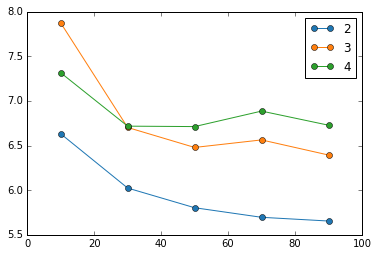

In [38]:
mean_mean = pd.DataFrame({a:means[a].mean(axis=1) for a in range(2, 5)})
mean_mean.plot(color=tableau20blind[::2], marker='o', xlim=(0, 100))

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:983: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


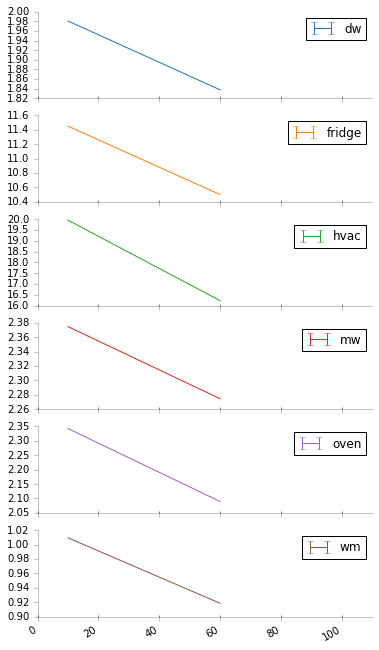

In [20]:
ax = means_df.plot(subplots=True, yerr=std_df, figsize=(6, 12), xlim=(0, 110), colors=tableau20blind[::2])
for a in ax:
    format_axes(a)

In [39]:
st = pd.HDFStore('transfer.h5', mode='a')
st['/transfer_mean'] = mean_mean
#st['/transfer_sd'] = std_df
print st.keys()
st.close()

['/normal_mean', '/normal_sd', '/transfer_mean', '/transfer_sd']


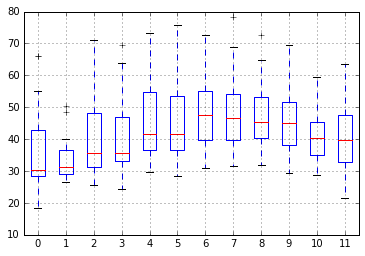

In [85]:
#prediction_appliance.boxplot()
gt_appliance = df[['%s_%d' %(appliance, month) for month in range(1, 13)]]
gt_appliance.columns = prediction_appliance.columns
gt_appliance.boxplot()

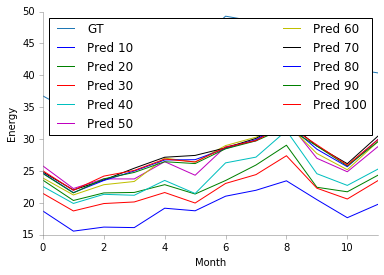

In [113]:
gt_appliance.mean().plot(label='GT', color=tableau20blind[::2][0])
for f in range(10, 110, 10):
  
    random_seed=2
    appliance='fridge'
    prediction_appliance = pd.concat(pred[random_seed][appliance][f]).ix[df.index]
    prediction_appliance.mean().plot(label='Pred '+str(f))
plt.legend(loc=0, mode="expand", ncol=2)
format_axes(plt.gca())
plt.xlabel("Month")
plt.ylabel("Energy")

In [114]:
import pickle
pickle.dump(pred, open("predictions/transfer_pred.pkl", 'w'))

In [117]:
!ls -lah predictions/transfer_pred.pkl

-rw-r--r--  1 nipunbatra  staff    10M Jun 26 16:59 predictions/transfer_pred.pkl
